ANKIT RAJ

2206400

IT-01

DA_ASSIGNMENT

In [14]:
import pandas as pd
import numpy as np

linearX = pd.read_csv('linearX.csv', header = None)
linearY = pd.read_csv('linearY.csv', header = None)

linearX.head, linearY.head()

(<bound method NDFrame.head of        0
 0    9.1
 1    8.0
 2    9.1
 3    8.4
 4    6.9
 ..   ...
 95   7.8
 96  10.2
 97   6.1
 98   7.3
 99   7.3
 
 [100 rows x 1 columns]>,
          0
 0  0.99523
 1  0.99007
 2  0.99769
 3  0.99386
 4  0.99508)

In [15]:
# Normalize the predictor variable (X)
x_normalized = (linearX - linearX.mean()) / linearX.std()

# Check the first few rows of the normalized data
x_normalized.head()

,0
0,0.599375
1,-0.035801
2,0.599375
3,0.195172
4,-0.670976


In [16]:
df = pd.concat([x_normalized, linearY], axis = 1)
df.columns = ['X', 'Y']

df.shape

(100, 2)

In [17]:
df.head(), df.tail()

(          X        Y
 0  0.599375  0.99523
 1 -0.035801  0.99007
 2  0.599375  0.99769
 3  0.195172  0.99386
 4 -0.670976  0.99508,
            X        Y
 95 -0.151287  0.99620
 96  1.234550  0.99760
 97 -1.132922  0.99464
 98 -0.440003  0.99830
 99 -0.440003  0.99670)

In [18]:
X = df['X'].values
Y = df['Y'].values
print(X)
print("------------")
print(Y)

[ 0.59937475 -0.0358008   0.59937475  0.19517212 -0.67097636 -0.2090305
  4.35268484 -0.44000343 -0.61323312 -0.49774666  1.17680707  1.98521232
 -0.55548989  1.11906384  0.48388828 -0.09354404 -1.42163837 -1.01743575
 -0.78646282  1.35003677  0.25291536 -0.3822602  -1.01743575 -1.53712484
  0.48388828  0.77260445 -0.32451696  2.21618525 -0.15128727 -0.3822602
  1.58100969  1.2345503  -1.07517898 -0.2090305   3.25556343 -0.0358008
 -0.78646282 -0.78646282 -0.61323312  0.13742889 -0.3822602   1.06132061
 -1.13292221 -0.61323312 -1.53712484  1.52326646 -0.26677373  0.48388828
  0.65711798 -0.84420605 -0.49774666 -0.0358008  -0.15128727 -0.09354404
 -0.61323312 -0.61323312 -0.26677373  0.59937475  0.54163152 -0.09354404
 -0.84420605  2.21618525 -0.90194929 -0.55548989  0.42614505 -0.32451696
 -0.2090305  -1.19066545  1.46552323 -0.84420605  0.07968566 -0.09354404
 -0.55548989 -1.42163837 -0.95969252 -0.32451696  1.00357737 -0.61323312
  1.40778    -0.55548989 -1.07517898 -0.90194929 -0.20

In [19]:
# simple Lineara Reg code
#question 1


class SimpleLinearRegression:
    def __init__(self, learningRate = 0.5, epochs = 1000):
        self.learningRate = learningRate
        self.epochs = epochs
        self.slope = 0
        self.intercept = 0
        self.costArr = []

    def fit(self, X, Y):
        n = len(X)
        for _ in range(self.epochs):
            Y_pred = self.slope * X + self.intercept

            d_slope = (-2 / n) * np.sum(X * (Y - Y_pred))
            d_intercept = (-2 / n) * np.sum(Y - Y_pred)

            self.slope -= self.learningRate * d_slope
            self.intercept -= self.learningRate * d_intercept

            # cal. ing cost 
            # cost function cal
            cost = (1 / (2 * n)) * np.sum((Y - Y_pred) ** 2)
            self.costArr.append(cost)

    def predict(self, X):
        return self.slope * X + self.intercept

    def evaluate(self, X, Y):
        predictions = self.predict(X)
        mse = (1 / (2 * len(Y))) * np.sum((Y - predictions) ** 2)
        return mse


reg = SimpleLinearRegression(learningRate = 0.5, epochs = 1000)
reg.fit(X, Y)
# print("done", reg)

predict = reg.predict(X)
msqe = reg.evaluate(X, Y)

In [20]:
print("slope: ", reg.slope)
print("intercept: ", reg.intercept)
print("mean squear error: ", msqe)

slope:  0.0013469476784633706
intercept:  0.9966201
mean squear error:  1.1947898109836577e-06


#Question 2

Advantage of Averaging the Cost

Scaler independence: averaging ensures the cost function is independent of the dataset size. without averaging the cost would grow with number data pts.

Simplified learning rate: averaging keeps the gradient value in range, which helps in tuning the learning rate and ensures stability during gradient descent.

Numerical stability: averaging prevents the cost and gradient from becoming large, which could lead to numberical instability during computation.

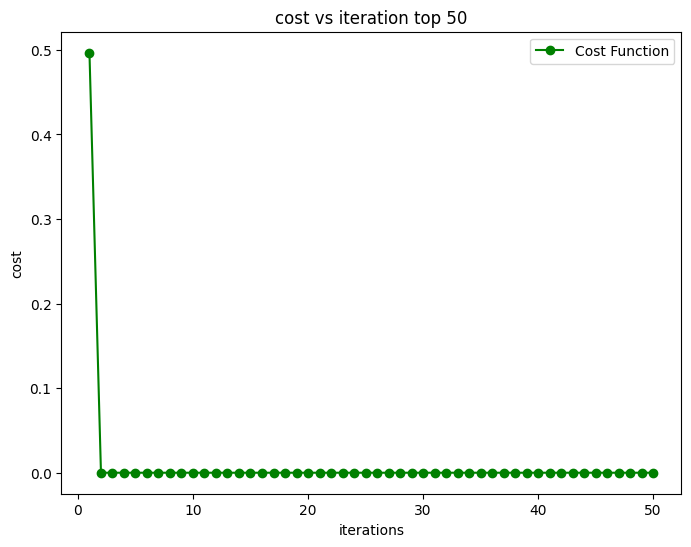

In [21]:
#question 3

import matplotlib.pyplot as plt

# cost function vs iteration 
plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), reg.costArr[:50], color = 'green', marker = 'o', label = 'Cost Function')
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iteration top 50")
plt.legend()
plt.show()

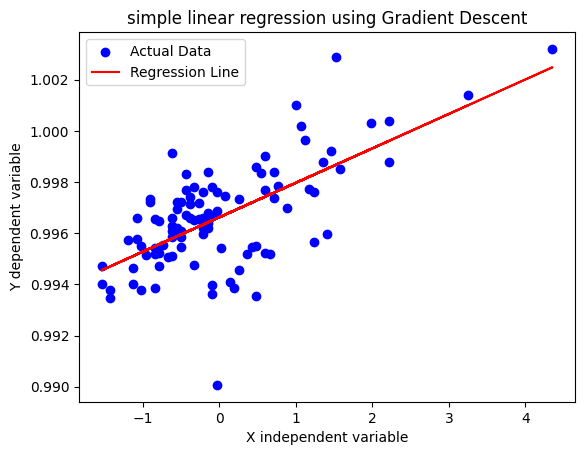

In [22]:
# data pts. and straight lines
#question 4

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, predict, color='red', label='Regression Line')
# plt.xlim()
plt.xlabel('X independent variable')
# plt.ylim(-2, 2)
plt.ylabel('Y dependent variable')
plt.legend()
plt.title('simple linear regression using Gradient Descent')
plt.show()

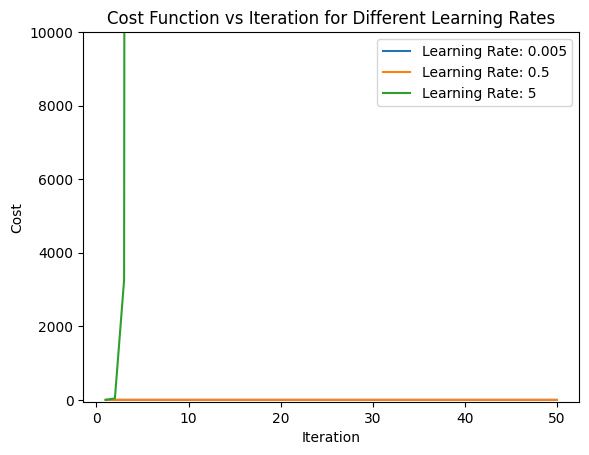

In [23]:
# different learning rates
# qusetion 5

learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    reg = SimpleLinearRegression(learningRate=lr, epochs=50)
    reg.fit(X, Y)
    plt.plot(range(1, 51), reg.costArr, label=f'Learning Rate: {lr}')

# plt.xlim(-50, 50)
plt.xlabel('Iteration')
plt.ylim(-50, 10000)
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()

In [24]:
# Question6 stochastic


class StochasticGDLinearRegression:
    def __init__(self, learningRate=0.01, epochs=60):
        self.learningRate = learningRate
        self.epochs = epochs
        self.slope = 0
        self.intercept = 0
        self.costArr = []

    def fit(self, X, Y):
        n = len(X)
        for epoch in range(self.epochs):
            for i in range(n):
                xi = X[i]
                yi = Y[i]
                
                yi_pred = self.slope * xi + self.intercept

                d_slope = -2 * xi * (yi - yi_pred)
                d_intercept = -2 * (yi - yi_pred)

                self.slope -= self.learningRate * d_slope
                self.intercept -= self.learningRate * d_intercept

            #cost
            Y_pred = self.slope * X + self.intercept
            cost = np.mean((Y - Y_pred) ** 2)
            self.costArr.append(cost)


sgd_reg = StochasticGDLinearRegression(learningRate=0.01, epochs=60)
sgd_reg.fit(X, Y)

In [25]:
# Q6 mini batch

class MiniBatchGDLinearRegression:
    def __init__(self, learningRate=0.01, epochs=60, batch_size=10):
        self.learningRate = learningRate
        self.epochs = epochs
        self.batch_size = batch_size
        self.slope = 0
        self.intercept = 0
        self.costArr = []

    def fit(self, X, Y):
        n = len(X)
        for epoch in range(self.epochs):
            indices = np.random.permutation(n)
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]
            for i in range(0, n, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                Y_batch = Y_shuffled[i:i + self.batch_size]

                Y_pred = self.slope * X_batch + self.intercept

                d_slope = (-2 / len(X_batch)) * np.sum(X_batch * (Y_batch - Y_pred))
                d_intercept = (-2 / len(X_batch)) * np.sum(Y_batch - Y_pred)

                # updation
                self.slope -= self.learningRate * d_slope
                self.intercept -= self.learningRate * d_intercept

            # cost
            Y_pred = self.slope * X + self.intercept
            cost = np.mean((Y - Y_pred) ** 2)
            self.costArr.append(cost)


mbgd_reg = MiniBatchGDLinearRegression(learningRate=0.01, epochs=60, batch_size=10)
mbgd_reg.fit(X, Y)

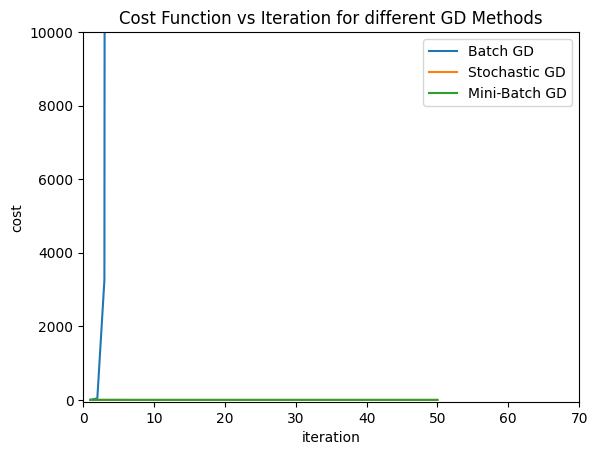

In [26]:
# graph for stochastic and mini batch

plt.plot(range(1, 51), reg.costArr[:50], label='Batch GD')
plt.plot(range(1, 51), sgd_reg.costArr[:50], label='Stochastic GD')
plt.plot(range(1, 51), mbgd_reg.costArr[:50], label='Mini-Batch GD')

plt.xlim(0, 70)
plt.xlabel('iteration')

plt.ylim(-50, 10000)
plt.ylabel('cost')
plt.title('Cost Function vs Iteration for different GD Methods')
plt.legend()
plt.show()